In [85]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from keras.models import Sequential

In [86]:
root_path="C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_5seeds"
class_names = sorted(os.listdir(root_path))[:-1]
class_names

['IR20',
 'adt37',
 'amman',
 'andhra bpt',
 'eramalli',
 'karuppu kavuni',
 'keerthi',
 'mtu 1010',
 'mtu 1290',
 'narmadha',
 'pacha ponni']

In [87]:
file_path ="C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_5seeds"

In [88]:
filepaths= list(glob.glob(file_path+'/**/*.*'))

In [89]:
print(filepaths[0:2])

['C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_5seeds\\adt37\\ADT37 (1).jpg', 'C:/Users/DELL/Desktop/pythonproj/PICTURES/dataset_5seeds\\adt37\\ADT37 (10).jpg']


In [90]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [91]:
labels

['adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',
 'adt37',


In [92]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data= data.sample(frac=1).reset_index(drop=True)
data.head(12)

,Filepath,Label
0,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,andhra bpt
1,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,pacha ponni
2,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,narmadha
3,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,amman
4,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,pacha ponni
5,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,narmadha
6,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,mtu 1010
7,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,karuppu kavuni
8,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,eramalli
9,C:/Users/DELL/Desktop/pythonproj/PICTURES/data...,narmadha


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'andhra bpt'),
  Text(1, 0, 'pacha ponni'),
  Text(2, 0, 'narmadha'),
  Text(3, 0, 'amman'),
  Text(4, 0, 'mtu 1010'),
  Text(5, 0, 'karuppu kavuni'),
  Text(6, 0, 'eramalli'),
  Text(7, 0, 'mtu 1290'),
  Text(8, 0, 'sonna masur'),
  Text(9, 0, 'keerthi'),
  Text(10, 0, 'adt37'),
  Text(11, 0, 'IR20')])

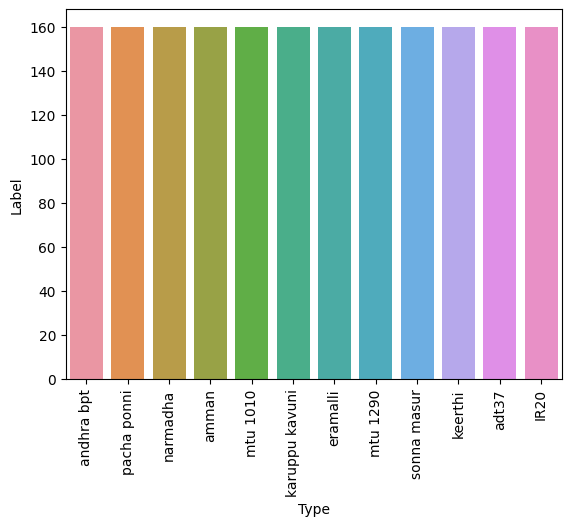

In [93]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [94]:
train, test= train_test_split(data, test_size=0.30, random_state=42)

In [95]:
test, valid = train_test_split(test, test_size=0.5, random_state=42)

In [96]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=180,
    width_shift_range=1.0,
    height_shift_range=1.0,
    shear_range=0.7,
    zoom_range=0.7,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=180,
    width_shift_range=1.0,
    height_shift_range=1.0,
    shear_range=0.7,
    zoom_range=0.7,
    horizontal_flip=True,
    fill_mode='nearest')

In [97]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=40
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=40
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(512,512),
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
)

Found 1344 validated image filenames belonging to 12 classes.
Found 288 validated image filenames belonging to 12 classes.
Found 288 validated image filenames belonging to 12 classes.


In [98]:
model = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), strides=(2, 2), padding='same', input_shape=(512, 512, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),

    layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(12, activation='softmax')
])

# Define the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



In [99]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=2,
                             mode='auto')]

In [100]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100
21/21 [==============================] - 312s 15s/step - loss: 2.4636 - accuracy: 0.1176 - val_loss: 2.4792 - val_accuracy: 0.1319
Epoch 2/100
21/21 [==============================] - 264s 13s/step - loss: 2.3114 - accuracy: 0.1972 - val_loss: 2.4457 - val_accuracy: 0.1076
Epoch 3/100
21/21 [==============================] - 260s 12s/step - loss: 2.2045 - accuracy: 0.2225 - val_loss: 2.4094 - val_accuracy: 0.1319
Epoch 4/100
21/21 [==============================] - 258s 12s/step - loss: 2.1351 - accuracy: 0.2388 - val_loss: 2.4118 - val_accuracy: 0.1111
Epoch 5/100
21/21 [==============================] - 261s 12s/step - loss: 2.0643 - accuracy: 0.2731 - val_loss: 2.3528 - val_accuracy: 0.1667
Epoch 6/100
21/21 [==============================] - 259s 12s/step - loss: 2.0058 - accuracy: 0.2961 - val_loss: 2.2975 - val_accuracy: 0.1771
Epoch 7/100
21/21 [==============================] - 259s 12s/step - loss: 1.9352 - accuracy: 0.3185 - val_loss: 2.2640 - val_accuracy: 0.2222

Epoch 58/100
21/21 [==============================] - 290s 14s/step - loss: 0.9790 - accuracy: 0.6830 - val_loss: 1.4960 - val_accuracy: 0.5625
Epoch 59/100
21/21 [==============================] - 283s 14s/step - loss: 1.0116 - accuracy: 0.6577 - val_loss: 1.2310 - val_accuracy: 0.6007
Epoch 60/100
21/21 [==============================] - 282s 14s/step - loss: 0.9912 - accuracy: 0.6778 - val_loss: 1.1283 - val_accuracy: 0.6354
Epoch 61/100
21/21 [==============================] - 281s 13s/step - loss: 0.9966 - accuracy: 0.6689 - val_loss: 1.0999 - val_accuracy: 0.6632
Epoch 62/100
21/21 [==============================] - 280s 13s/step - loss: 0.9344 - accuracy: 0.6957 - val_loss: 1.0462 - val_accuracy: 0.6597
Epoch 63/100
21/21 [==============================] - 279s 13s/step - loss: 0.9642 - accuracy: 0.6823 - val_loss: 1.0285 - val_accuracy: 0.7014
Epoch 64/100
21/21 [==============================] - 278s 13s/step - loss: 0.9557 - accuracy: 0.6964 - val_loss: 1.0735 - val_accuracy:

In [101]:
test_loss, test_acc = model.evaluate(test_gen)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')


5/5 [==============================] - 42s 8s/step - loss: 1.0027 - accuracy: 0.6771
Test Loss: 1.0027178525924683, Test Accuracy: 0.6770833134651184


In [102]:
model.save("model_best.h5")

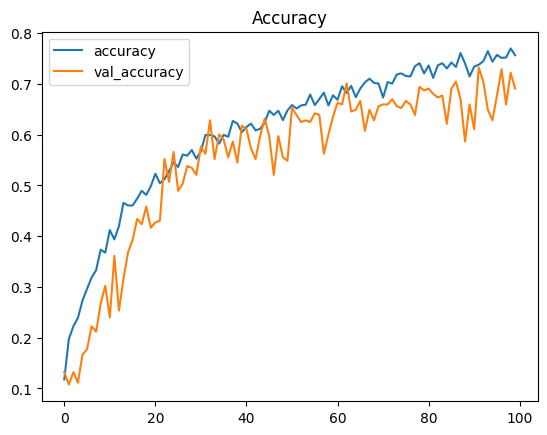

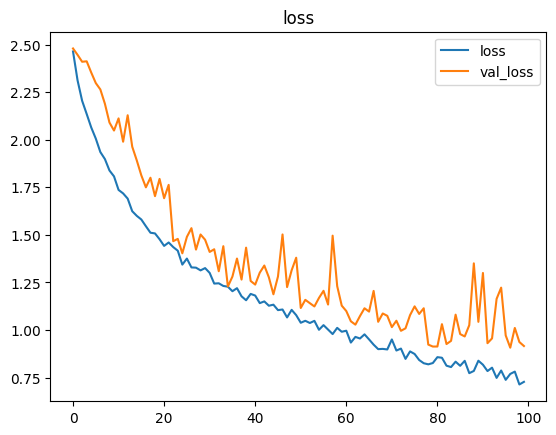

In [103]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("loss")
plt.show()

In [104]:
results = model.evaluate(test_gen, verbose=0)
print("   Test loss:  {:.5f}".format(results[0]))
print("Test Accuracy:  {:.2f}%".format(results[1] * 100))

   Test loss:  0.93989
Test Accuracy:  71.18%


In [105]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

5/5 [==============================] - 45s 9s/step


In [106]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

                precision    recall  f1-score   support

          IR20       0.10      0.16      0.12        19
         adt37       0.12      0.10      0.11        29
         amman       0.10      0.08      0.09        24
    andhra bpt       0.09      0.07      0.08        27
      eramalli       0.00      0.00      0.00        14
karuppu kavuni       0.13      0.13      0.13        30
       keerthi       0.07      0.09      0.08        23
      mtu 1010       0.22      0.08      0.12        25
      mtu 1290       0.00      0.00      0.00        26
      narmadha       0.04      0.05      0.04        21
   pacha ponni       0.13      0.14      0.14        28
   sonna masur       0.13      0.09      0.11        22

      accuracy                           0.09       288
     macro avg       0.09      0.08      0.08       288
  weighted avg       0.10      0.09      0.09       288



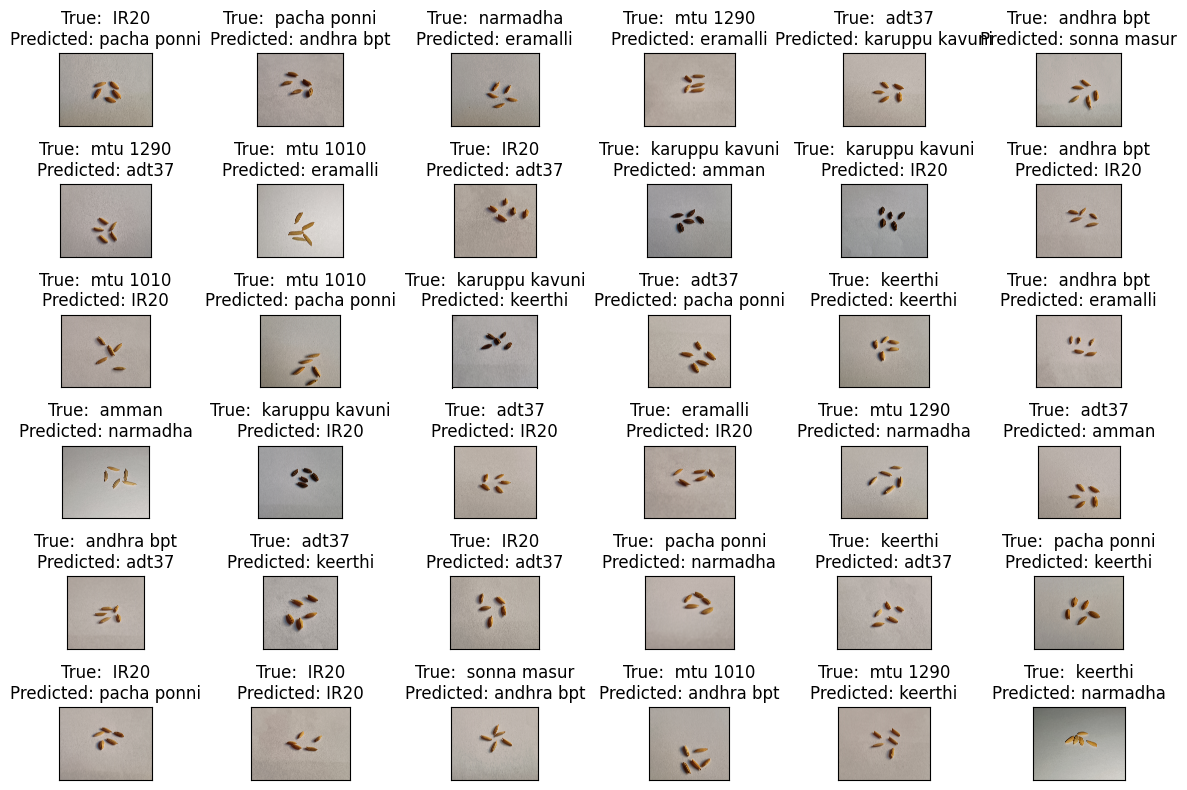

In [107]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(12,8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:  {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()